## Group Assignment #4 - Predict survival on Titanic

#### Library import

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

### Preliminary Data Analysis

Load the dataset

In [124]:
train = pd.read_csv('data/train.csv', index_col='PassengerId')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
train.shape

(891, 11)

### Basic statistics

In [114]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The range of values of the variable 'Fare' is huge, but considering the 75% percentile, we see that most of the values are below 31.

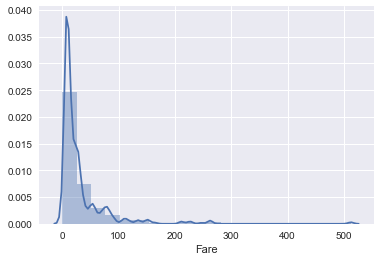

In [174]:
sns.distplot(train['Fare'], bins=20, hist=True);

Looking at the histogram of 'Fare' we see that the price paid was in most cases lower than 30

In [121]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [117]:
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

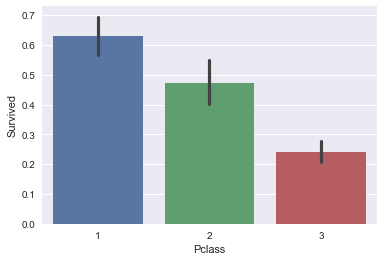

In [167]:
sns.barplot(data=train, x='Pclass', y='Survived');

Most passengers that survive were: Female (74%) and travelled in Pclass 1 (63%)

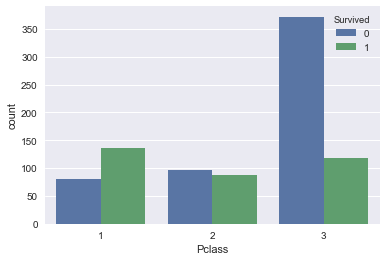

In [349]:
sns.countplot(data=train, x='Pclass', hue='Survived');

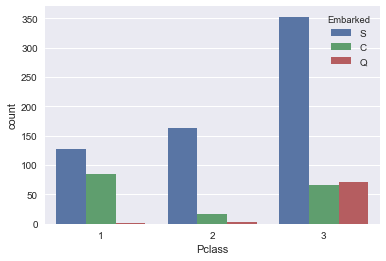

In [143]:
sns.countplot(data=train, x='Pclass', hue='Embarked');

A great number of passengers embarked in Queenstown and most of them paid the lowest fare

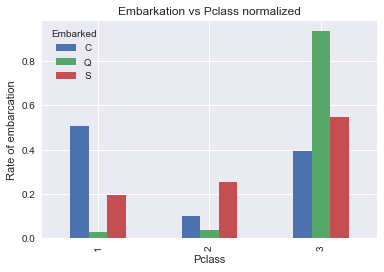

In [138]:
fig, ax = plt.subplots(1,1)
plt.title('Embarkation vs Pclass normalized')
plt.ylabel('Rate of embarkation')
train.groupby('Embarked')['Pclass'].value_counts(normalize=True).unstack().T.plot.bar(ax=ax);

By seeing the percentage of each Pclass according to where they embarked, we can conclude that in the UK locations (Queenstown and Southampton) most of the people who embark corresponded to the poorest class while in France(Cherbourg) the highest percentage of passengers relate to the top class.

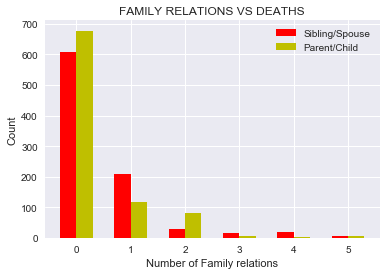

In [146]:
is_noS = df['SibSp'] == 0

NoSibsp = df[is_noS]

is_oneS =df['SibSp'] == 1

OneSibsp =df[is_oneS]

is_twoS = df['SibSp'] == 2

TwoSibsp = df[is_twoS]

is_threeS =df['SibSp'] == 3

ThreeSibsp =df[is_threeS]

is_fourS = df['SibSp'] == 4

FourSibsp = df[is_fourS]

is_fiveS =df['SibSp'] == 5

FiveSibsp =df[is_fiveS]





is_noP = df['Parch'] == 0

NoParch = df[is_noP]

is_oneP =df['Parch'] == 1

OneParch =df[is_oneP]

is_twoP = df['Parch'] == 2

TwoParch = df[is_twoP]

is_threeP =df['Parch'] == 3

ThreeParch =df[is_threeP]

is_fourP = df['Parch'] == 4

FourParch = df[is_fourP]

is_fiveP =df['Parch'] == 5

FiveParch =df[is_fiveP]





a = [len(NoSibsp), len(OneSibsp), len(TwoSibsp), len(ThreeSibsp), len(FourSibsp), len(FiveSibsp)]

b = [len(NoParch), len(OneParch), len(TwoParch), len(ThreeParch), len(FourParch), len(FiveParch)]



x = np.arange(6)



fig, ax = plt.subplots()

p1 = ax.bar(x, a, width=0.3,color='r')

p2 = ax.bar(x+0.3, b, width=0.3,color='y')



ax.legend((p1[0], p2[0]), ('Sibling/Spouse', 'Parent/Child'))

plt.xlabel('Number of Family relations')

plt.ylabel('Count')

ax.set_xticks(x + 0.3/ 2)

ax.set_xticklabels((0, 1, 2, 3, 4, 5))

ax.set_title('FAMILY RELATIONS VS DEATHS')



plt.show()

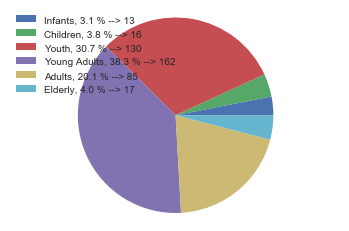

In [160]:
is_alive = df['Survived'] == 1

alive = df[is_alive]

is_dead=df['Survived'] ==0

dead =df[is_dead]



Infants = dead[(1 <= dead['Age']) & (dead['Age'] <= 5)]

Children = dead[(6 <= dead['Age']) & (dead['Age'] <= 12)]

Youth = dead[(13 <= dead['Age']) & (dead['Age'] <= 24)]

Young_adults = dead[(25 <= dead['Age']) & (dead['Age'] <= 39)]

Adults = dead[(40 <= dead['Age']) & (dead['Age'] <= 60)]

Elderly = dead[(61 <= dead['Age']) & (dead['Age'] <= 100)]

Agelist = np.array([len(Infants), len(Children), len(Youth), len(Young_adults), len(Adults), len(Elderly)])



#print(Agelist)



percents =  (Agelist / sum(Agelist))*100



labels = ['Infants', 'Children', 'Youth', 'Young Adults', 'Adults', 'Elderly']

explode = (0, 0, 0.1, 0, 0, 0)

plt.pie(Agelist, explode=explode, radius=100000000000)

plt.axis('equal')

plt.legend( loc = 'upper left', labels=['%s, %1.1f %% --> %d' % (l, s, count) for l, s, count in zip(labels, percents, Agelist)])

plt.show()

### Feature engineering

In [163]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are missing values in the Age, Cabin and Embarked Variables

In [261]:
train1 = train.copy()

In [262]:
split = train1['Name'].str.split('[,.]')

In [267]:
split.to_frame()





,Name
PassengerId,
1,"[Braund, Mr, Owen Harris]"
2,"[Cumings, Mrs, John Bradley (Florence Briggs..."
3,"[Heikkinen, Miss, Laina]"
4,"[Futrelle, Mrs, Jacques Heath (Lily May Peel)]"
5,"[Allen, Mr, William Henry]"
6,"[Moran, Mr, James]"
7,"[McCarthy, Mr, Timothy J]"
8,"[Palsson, Master, Gosta Leonard]"
9,"[Johnson, Mrs, Oscar W (Elisabeth Vilhelmina..."


In [238]:
NameSplit[1].to_list()

AttributeError: 'list' object has no attribute 'to_list'

In [271]:
split[1][1]

' Mr'

In [219]:
NameSplit.isin(

PassengerId
1                            [Braund,  Mr,  Owen Harris]
2      [Cumings,  Mrs,  John Bradley (Florence Briggs...
3                             [Heikkinen,  Miss,  Laina]
4       [Futrelle,  Mrs,  Jacques Heath (Lily May Peel)]
5                           [Allen,  Mr,  William Henry]
6                                   [Moran,  Mr,  James]
7                            [McCarthy,  Mr,  Timothy J]
8                     [Palsson,  Master,  Gosta Leonard]
9      [Johnson,  Mrs,  Oscar W (Elisabeth Vilhelmina...
10               [Nasser,  Mrs,  Nicholas (Adele Achem)]
11                   [Sandstrom,  Miss,  Marguerite Rut]
12                          [Bonnell,  Miss,  Elizabeth]
13                    [Saundercock,  Mr,  William Henry]
14                       [Andersson,  Mr,  Anders Johan]
15              [Vestrom,  Miss,  Hulda Amanda Adolfina]
16                  [Hewlett,  Mrs,  (Mary D Kingcome) ]
17                              [Rice,  Master,  Eugene]
18                 

In [203]:
get(NameSplit[1])

['Braund', ' Mr', ' Owen Harris']

In [199]:
pd.get([str.strip(name[1]) for name in NameSplit.values])#, drop_first=True)

AttributeError: module 'pandas' has no attribute 'get'

In [186]:
train1[train1['Name'].str.contains("Mr")].mean()

Survived     0.284389
Pclass       2.323029
Age         33.118395
SibSp        0.367852
Parch        0.282844
Fare        28.537305
dtype: float64

In [183]:
train1[train1['Name'].str.contains("Mrs")].mean()

Survived     0.790698
Pclass       1.984496
Age         35.642857
SibSp        0.682171
Parch        0.806202
Fare        44.731944
dtype: float64

In [184]:
train1[train1['Name'].str.contains("Miss")].mean()

Survived     0.697802
Pclass       2.307692
Age         21.773973
SibSp        0.714286
Parch        0.549451
Fare        43.797873
dtype: float64

In [341]:
adjust = train1.drop(['Sex','Embarked','Ticket','Name', 'Cabin', 'Survived', 'Pclass'],axis=1,inplace=False)

In [342]:
Sex_d = pd.get_dummies(train1['Sex'])
Embarked_d = pd.get_dummies(train1['Embarked'])
Pclass_d = pd.get_dummies(train1['Pclass'])

In [343]:
X = pd.concat([adjust, Sex_d, Embarked_d, Pclass_d], axis=1)

In [344]:
X.head()

,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
PassengerId,,,,,,,,,,,,
1,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
2,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
4,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
5,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [345]:
y = train1['Survived']

In [331]:
from sklearn.linear_model import LogisticRegression

In [308]:
from sklearn.model_selection import train_test_split

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=2)

In [347]:
logreg = LogisticRegression()




In [348]:
logreg.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_pred = logreg.predict(X_test)